## Download and Parse Sleep-EDF Database 

This notebook will download and parse through the EDF database data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pdb
import pandas as pd
import os
import urllib.request
from pyedflib import highlevel
import glob

Define some constants 

In [2]:
"""
Definition of sleep stages:
Wake = 0
N1 = 1
N2 = 2
N3 = 3
N4 = 4
REM = 5
Artifact/Unlabeled: -1
"""

#all EEG data is 100Hz sampling rate
fs = 100

#URL for data
data_url = 'https://archive.physionet.org/physiobank/database/sleep-edfx/'

#define the data directory
data_dir = 'data/'

Download the data

In [3]:
#make the data directory if it isn't already there
if not os.path.exists(data_dir):
    os.makedirs(data_dir)

#get a list of records and remove newlines
with open('RECORDS.txt') as f: records = f.readlines()
record_names = [r.strip() for r in records]

labeled_data = []
#read each record from the database
for record_name in record_names:
    if record_name.startswith('SC'):
        file_url = '%ssleep-cassette/%s' % (data_url, record_name)
    else:
        file_url = '%ssleep-telemetry/%s' % (data_url, record_name)

    #define the filepath
    filepath = '%s%s' % (data_dir, record_name)

    #download the file if it isn't already downloaded
    if not os.path.exists(filepath):
        print('Downloading %s...' % record_name)
        urllib.request.urlretrieve(file_url, filepath)


Parse through the data and save as pickle files

Reading Channels:  20%|██        | 1/5 [00:00<00:01,  3.34it/s]

data/ST7152JA-Hypnogram.edf


Reading Channels: 100%|██████████| 5/5 [00:01<00:00,  4.02it/s]
Reading Channels: 0it [00:00, ?it/s]


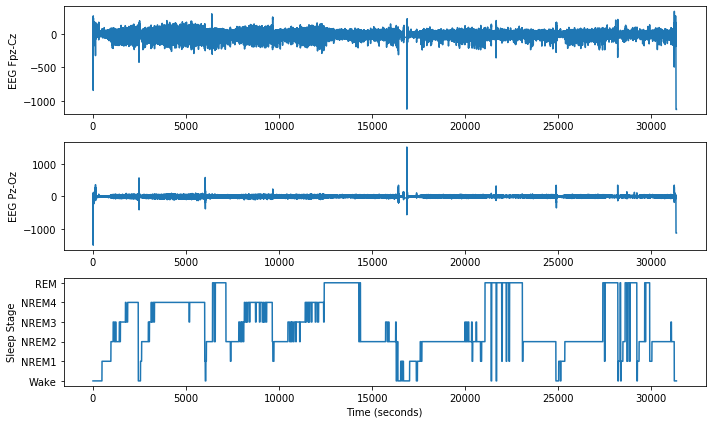

Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4411EJ-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:03<00:00,  1.92it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4611EG-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:03<00:00,  2.17it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4141EU-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:05<00:00,  1.34it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4662EJ-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4401EC-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:03<00:00,  1.77it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/5 [00:00<?, ?it/s]

data/ST7012JP-Hypnogram.edf


Reading Channels: 100%|██████████| 5/5 [00:01<00:00,  4.16it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4462FJ-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:04<00:00,  1.56it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4432EM-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4542FW-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4821GC-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4272FM-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4041EC-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4761EP-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:04<00:00,  1.63it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:  20%|██        | 1/5 [00:00<00:01,  3.49it/s]

data/ST7071JA-Hypnogram.edf


Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/ST7071JA-Hypnogram.edf: the file is not EDF(+) or BDF(+) compliant (EDF+ Recordingfield)
data/SC4092EC-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:03<00:00,  1.94it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4232EV-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:03<00:00,  1.78it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4751EC-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4362FC-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:02<00:00,  3.11it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/5 [00:00<?, ?it/s]

data/ST7081JW-Hypnogram.edf


Reading Channels: 100%|██████████| 5/5 [00:01<00:00,  4.51it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4101EC-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4702EA-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:03<00:00,  1.91it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4311EC-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4492GJ-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:03<00:00,  2.11it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4162EC-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:04<00:00,  1.59it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4551FC-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/5 [00:00<?, ?it/s]

data/ST7042JO-Hypnogram.edf


Reading Channels: 100%|██████████| 5/5 [00:01<00:00,  3.74it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4642EP-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:04<00:00,  1.60it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4511EJ-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:03<00:00,  2.04it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/5 [00:00<?, ?it/s]

data/ST7052JA-Hypnogram.edf


Reading Channels: 100%|██████████| 5/5 [00:01<00:00,  3.95it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4802GV-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:04<00:00,  1.55it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:  20%|██        | 1/5 [00:00<00:01,  2.87it/s]

data/ST7221JA-Hypnogram.edf


Reading Channels: 100%|██████████| 5/5 [00:01<00:00,  3.90it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4722EM-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:04<00:00,  1.64it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4292GC-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:04<00:00,  1.54it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4192EV-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4562FJ-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4711EC-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4371FA-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:04<00:00,  1.56it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:  14%|█▍        | 1/7 [00:02<00:16,  2.78s/it]

data/SC4572FC-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:04<00:00,  1.56it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4461FA-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/5 [00:00<?, ?it/s]

data/ST7171JA-Hypnogram.edf


Reading Channels: 100%|██████████| 5/5 [00:01<00:00,  4.49it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/5 [00:00<?, ?it/s]

data/ST7112JE-Hypnogram.edf


Reading Channels: 100%|██████████| 5/5 [00:01<00:00,  4.24it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/5 [00:00<?, ?it/s]

data/ST7192JR-Hypnogram.edf


Reading Channels: 100%|██████████| 5/5 [00:01<00:00,  3.94it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4512EW-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:04<00:00,  1.54it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4262FC-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:04<00:00,  1.61it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4001EC-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:03<00:00,  1.89it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4211EC-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:03<00:00,  1.78it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4441EC-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4122EV-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:03<00:00,  1.91it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:  20%|██        | 1/5 [00:00<00:01,  2.94it/s]

data/ST7062JR-Hypnogram.edf


Reading Channels: 100%|██████████| 5/5 [00:01<00:00,  3.96it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4021EH-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:04<00:00,  1.59it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4062EC-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:04<00:00,  1.64it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:  14%|█▍        | 1/7 [00:03<00:18,  3.14s/it]

data/SC4622EJ-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:04<00:00,  1.45it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4242EA-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4532EV-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:03<00:00,  2.00it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4051EC-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:04<00:00,  1.66it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:  20%|██        | 1/5 [00:00<00:01,  3.47it/s]

data/ST7142JE-Hypnogram.edf


Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/ST7142JE-Hypnogram.edf: the file is not EDF(+) or BDF(+) compliant (EDF+ Recordingfield)
data/SC4222EC-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:04<00:00,  1.55it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4552FW-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:03<00:00,  1.88it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4601EC-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:04<00:00,  1.64it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4421EA-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:03<00:00,  1.79it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4022EJ-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:04<00:00,  1.64it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:  20%|██        | 1/5 [00:00<00:01,  2.97it/s]

data/ST7121JE-Hypnogram.edf


Reading Channels: 100%|██████████| 5/5 [00:01<00:00,  3.86it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4241EC-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:03<00:00,  1.89it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4172EC-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:05<00:00,  1.19it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4732EJ-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:04<00:00,  1.43it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4191EP-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:04<00:00,  1.44it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4342FA-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:05<00:00,  1.30it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4301EC-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:04<00:00,  1.51it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4772GC-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:04<00:00,  1.56it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4291GA-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:05<00:00,  1.18it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4712EA-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:04<00:00,  1.65it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4111EC-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:04<00:00,  1.65it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4402EW-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:04<00:00,  1.62it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4372FC-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4591GY-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:04<00:00,  1.62it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/5 [00:00<?, ?it/s]

data/ST7242JO-Hypnogram.edf


Reading Channels: 100%|██████████| 5/5 [00:01<00:00,  4.33it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4151EC-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:03<00:00,  1.85it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:  20%|██        | 1/5 [00:00<00:01,  2.99it/s]

data/ST7211JJ-Hypnogram.edf


Reading Channels: 100%|██████████| 5/5 [00:01<00:00,  4.04it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4452FW-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:04<00:00,  1.61it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4322EC-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:  20%|██        | 1/5 [00:00<00:01,  3.01it/s]

data/ST7022JM-Hypnogram.edf


Reading Channels: 100%|██████████| 5/5 [00:01<00:00,  4.18it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/5 [00:00<?, ?it/s]

data/ST7202JO-Hypnogram.edf


Reading Channels: 100%|██████████| 5/5 [00:01<00:00,  4.33it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4701EC-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:04<00:00,  1.59it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4332FC-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:04<00:00,  1.60it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4762EG-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:04<00:00,  1.52it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4522EM-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:04<00:00,  1.64it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/5 [00:00<?, ?it/s]

data/ST7132JR-Hypnogram.edf


Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/ST7132JR-Hypnogram.edf: the file is not EDF(+) or BDF(+) compliant (EDF+ Recordingfield)
data/SC4282GC-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4482FJ-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4672GV-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4812GV-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:03<00:00,  1.75it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4201EC-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4612EA-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/5 [00:00<?, ?it/s]

data/ST7091JE-Hypnogram.edf


Reading Channels: 100%|██████████| 5/5 [00:01<00:00,  4.30it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/5 [00:00<?, ?it/s]

data/ST7182JR-Hypnogram.edf


Reading Channels: 100%|██████████| 5/5 [00:01<00:00,  3.84it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4471FA-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/5 [00:00<?, ?it/s]

data/ST7102JE-Hypnogram.edf


Reading Channels: 100%|██████████| 5/5 [00:01<00:00,  4.26it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/5 [00:00<?, ?it/s]

data/ST7162JM-Hypnogram.edf


Reading Channels: 100%|██████████| 5/5 [00:01<00:00,  4.38it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4182EC-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:04<00:00,  1.55it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4741EA-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:04<00:00,  1.66it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4032EP-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:03<00:00,  2.03it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4531EM-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4382FW-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:04<00:00,  1.63it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4561FJ-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:03<00:00,  1.76it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4252EU-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:04<00:00,  1.62it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/5 [00:00<?, ?it/s]

data/ST7222JA-Hypnogram.edf


Reading Channels: 100%|██████████| 5/5 [00:01<00:00,  4.43it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4121EC-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:04<00:00,  1.64it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4442EV-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:04<00:00,  1.62it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/5 [00:00<?, ?it/s]

data/ST7051JA-Hypnogram.edf


Reading Channels: 100%|██████████| 5/5 [00:01<00:00,  3.99it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4541FA-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:03<00:00,  1.75it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4082EP-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:03<00:00,  1.76it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/5 [00:00<?, ?it/s]

data/ST7061JR-Hypnogram.edf


Reading Channels: 100%|██████████| 5/5 [00:01<00:00,  3.88it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4671GJ-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:04<00:00,  1.55it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4061EC-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:04<00:00,  1.57it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4412EM-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4652EG-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4481FV-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:04<00:00,  1.61it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4212EC-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:03<00:00,  1.98it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4801GC-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:04<00:00,  1.59it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4002EC-Hypnogram.edf
data/SC4002E0-PSG.edf: the file is not EDF(+) or BDF(+) compliant (Filesize)
data/SC4571FV-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:  20%|██        | 1/5 [00:00<00:01,  3.04it/s]

data/ST7111JE-Hypnogram.edf


Reading Channels: 100%|██████████| 5/5 [00:01<00:00,  4.13it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/5 [00:00<?, ?it/s]

data/ST7172JA-Hypnogram.edf


Reading Channels: 100%|██████████| 5/5 [00:01<00:00,  4.38it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/5 [00:00<?, ?it/s]

data/ST7191JR-Hypnogram.edf


Reading Channels: 100%|██████████| 5/5 [00:01<00:00,  3.91it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4221EJ-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:04<00:00,  1.63it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4602EJ-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:04<00:00,  1.62it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4042EC-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:04<00:00,  1.59it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4431EM-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:  20%|██        | 1/5 [00:00<00:01,  2.65it/s]

data/ST7011JP-Hypnogram.edf


Reading Channels: 100%|██████████| 5/5 [00:01<00:00,  3.61it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4822GC-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:04<00:00,  1.63it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4661EJ-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:04<00:00,  1.66it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4142EU-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:03<00:00,  2.03it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/5 [00:00<?, ?it/s]

data/ST7151JA-Hypnogram.edf


Reading Channels: 100%|██████████| 5/5 [00:01<00:00,  3.35it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4351FA-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4491GJ-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:04<00:00,  1.54it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4641EP-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:03<00:00,  1.77it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:  20%|██        | 1/5 [00:00<00:01,  3.00it/s]

data/ST7041JO-Hypnogram.edf


Reading Channels: 100%|██████████| 5/5 [00:01<00:00,  4.11it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4161EC-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:04<00:00,  1.65it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4102EC-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:04<00:00,  1.52it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/5 [00:00<?, ?it/s]

data/ST7082JW-Hypnogram.edf


Reading Channels: 100%|██████████| 5/5 [00:01<00:00,  4.46it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4451FY-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:04<00:00,  1.54it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:  20%|██        | 1/5 [00:00<00:01,  3.43it/s]

data/ST7072JA-Hypnogram.edf


Reading Channels: 100%|██████████| 5/5 [00:01<00:00,  4.49it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4091EC-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4621EV-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:03<00:00,  1.86it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4281GC-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4731EM-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/5 [00:00<?, ?it/s]

data/ST7131JR-Hypnogram.edf


Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/ST7131JR-Hypnogram.edf: the file is not EDF(+) or BDF(+) compliant (EDF+ Recordingfield)
data/SC4131EC-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:04<00:00,  1.50it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4312EM-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:03<00:00,  1.77it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/5 [00:00<?, ?it/s]

data/ST7201JO-Hypnogram.edf


Reading Channels: 100%|██████████| 5/5 [00:01<00:00,  4.40it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/5 [00:00<?, ?it/s]

data/ST7021JM-Hypnogram.edf


Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/ST7021JM-Hypnogram.edf: the file is not EDF(+) or BDF(+) compliant (EDF+ Recordingfield)
data/SC4321EC-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:04<00:00,  1.51it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4152EC-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:03<00:00,  1.84it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/5 [00:00<?, ?it/s]

data/ST7212JJ-Hypnogram.edf


Reading Channels: 100%|██████████| 5/5 [00:01<00:00,  4.08it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4752EM-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4251EP-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4271FC-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4501EW-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:03<00:00,  1.75it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/5 [00:00<?, ?it/s]

data/ST7181JR-Hypnogram.edf


Reading Channels: 100%|██████████| 5/5 [00:01<00:00,  4.11it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4181EC-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4811GG-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:03<00:00,  2.19it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4331FV-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:03<00:00,  1.76it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:  20%|██        | 1/5 [00:00<00:01,  3.00it/s]

data/ST7101JE-Hypnogram.edf


Reading Channels: 100%|██████████| 5/5 [00:01<00:00,  3.94it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/5 [00:00<?, ?it/s]

data/ST7161JM-Hypnogram.edf


Reading Channels: 100%|██████████| 5/5 [00:01<00:00,  3.86it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4472FA-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:03<00:00,  1.79it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4012EC-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:03<00:00,  1.93it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/5 [00:00<?, ?it/s]

data/ST7092JE-Hypnogram.edf


Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/ST7092JE-Hypnogram.edf: the file is not EDF(+) or BDF(+) compliant (EDF+ Recordingfield)
data/SC4171EU-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4202EC-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4352FV-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4071EC-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4381FC-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:04<00:00,  1.63it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4302EV-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:04<00:00,  1.65it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/5 [00:00<?, ?it/s]

data/ST7122JE-Hypnogram.edf


Reading Channels: 100%|██████████| 5/5 [00:01<00:00,  4.25it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4632EA-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:04<00:00,  1.53it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4072EH-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:03<00:00,  1.76it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4631EM-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:04<00:00,  1.53it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4031EC-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:04<00:00,  1.63it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4581GM-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/5 [00:00<?, ?it/s]

data/ST7141JE-Hypnogram.edf


Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/ST7141JE-Hypnogram.edf: the file is not EDF(+) or BDF(+) compliant (EDF+ Recordingfield)
data/SC4422EA-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:04<00:00,  1.64it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4052EC-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:04<00:00,  1.53it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4011EH-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:03<00:00,  1.78it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4261FM-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4231EJ-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:03<00:00,  1.86it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4742EC-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:03<00:00,  1.88it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4081EC-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:  20%|██        | 1/5 [00:00<00:01,  2.70it/s]

data/ST7241JO-Hypnogram.edf


Reading Channels: 100%|██████████| 5/5 [00:01<00:00,  3.66it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4592GY-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:02<00:00,  2.69it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4582GP-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4112EC-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:03<00:00,  1.89it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4771GC-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4502EM-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4721EC-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:03<00:00,  2.28it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4651EP-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]
Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

data/SC4341FA-Hypnogram.edf


Reading Channels: 100%|██████████| 7/7 [00:03<00:00,  1.94it/s]
Reading Channels: 0it [00:00, ?it/s]


In [7]:
#get a list of all the hypnogram files
hypnogram_files = glob.glob('%s/*-Hypnogram.edf' % data_dir)
psg_files = glob.glob('%s/*-PSG.edf' % data_dir)
do_plot = True

for f in hypnogram_files:
    print(f)
    hypnogram_filepath = f

    #get the corresponding PSG filepath
    file_id = hypnogram_filepath.split('/')[1][0:7]
    file_index = [file_id in psg_file for psg_file in psg_files]
    file_index = np.where(np.array(file_index)==True)[0][0]
    psg_filepath = psg_files[file_index]

    #load the files
    try:
        psg_signals, psg_signal_headers, psg_header = highlevel.read_edf(psg_filepath)
        hypnogram_signals, hypnogram_signal_headers, hypnogram_header = highlevel.read_edf(hypnogram_filepath)
    except Exception as e:
        print(str(e))
        continue

    #put into a dataframe
    psg_columns = [psg_signal_headers[i]['label'] for i in range(2)]
    psg_df = pd.DataFrame({psg_columns[0]: psg_signals[0], psg_columns[1]: psg_signals[1]})

    #generate a sample resolution sleep stage label
    sleep_stages = []
    for annotation in hypnogram_header['annotations']:
        #extract the duration in samples of this sleep stage
        dur = int(str(annotation[1])[2:-1])
        sleep_stage = annotation[2][-1]

        #convert the label to the appropriate integer
        if sleep_stage == 'W':
            sleep_stage = 0
        elif sleep_stage == '1':
            sleep_stage = 1
        elif sleep_stage == '2':
            sleep_stage = 2
        elif sleep_stage == '3':
            sleep_stage = 3
        elif sleep_stage == '4':
            sleep_stage = 4
        elif sleep_stage == 'R':
            sleep_stage = 5
        else:
            sleep_stage = -1

        sleep_stages.extend([sleep_stage for i in range(dur*fs)])


    #cut off the psg data at the length of the sleep stage labels
    if len(psg_df) > len(sleep_stages):
        psg_df = psg_df[0:len(sleep_stages)]
    else:
        sleep_stages = sleep_stages[0:len(psg_df)]

    #add in the sleep stages into the df and save the df
    psg_df = psg_df.assign(label=sleep_stages)
    psg_df.to_pickle(hypnogram_filepath.split('-')[0] + '.pkl')
    
    #plot the first file
    if do_plot:
        do_plot = False
        fig, ax = plt.subplots(figsize=(10,6))
        plt.subplot(311)
        t = np.array([i/fs for i in range(len(psg_df))])
        plt.plot(t,psg_df['EEG Fpz-Cz'])
        plt.ylabel('EEG Fpz-Cz')

        plt.subplot(312)
        plt.plot(t, psg_df['EEG Pz-Oz'])
        plt.ylabel('EEG Pz-Oz')

        plt.subplot(313)
        ax = plt.gca()
        plt.plot(t, psg_df['label'])
        ax.set_yticks([0,1,2,3,4,5])
        ax.set_yticklabels(['Wake', 'NREM1', 'NREM2', 'NREM3', 'NREM4', 'REM'])
        plt.ylabel('Sleep Stage')
        plt.xlabel('Time (seconds)')
        plt.tight_layout()
        plt.savefig('parsed_data.png', dpi=150)
        plt.show()
    
    
